In [ ]:
import import_ipynb
%run 03-EDA.ipynb


### Imports

In [5]:
import math
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error , mean_absolute_percentage_error , mean_squared_error , accuracy_score
from sklearn.metrics import accuracy_score, classification_report,ConfusionMatrixDisplay, precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score, roc_curve, confusion_matrix
from sklearn.metrics import log_loss
from sklearn.metrics import make_scorer
from sklearn.ensemble import RandomForestClassifier



import statsmodels.api as sm

<a id="8"></a>
# <div style="padding:20px;color:white;margin:0;color:darkgreen;font-size:30px;font-family:Georgia;text-align:left;display:fill;border-radius:5px;background-color:#f2ffe6;overflow:hidden">8. | Model Development: CDC Data: Random Forest</div>

### Selected Features

In [10]:
selected_features_cdc_data = ['HighBP', 'HighChol', 'BMI', 'PhysActivity', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk',  'Age', 'Education' ,'Income','Stroke','HeartDiseaseorAttack']


<a id="8.1"></a>
# <div style="padding:20px;color:white;margin:0;color:darkcyan;font-size:20px;font-family:Georgia;text-align:left;display:fill;border-radius:5px;background-color:#E0FFFF;overflow:hidden">8.1 | Model Development: CDC Data: Random Forest: First Iteration</div>

### Split Features and Target

In [11]:
X = cdc_data[selected_features_cdc_data]
y = cdc_data['Diabetes_binary']

### Split Train and Test Dataset

In [7]:
X_train,X_test,y_train,y_test=  train_test_split(X,y,test_size=0.2,random_state=42)
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(202944, 13) (202944,)
(50736, 13) (50736,)


#### Train with Random Forest

In [8]:
model_rf = RandomForestClassifier()
model_rf.fit(X_train, y_train)

RandomForestClassifier()

### Predict Using Random Forest

In [9]:

predictions_train_rf = model_rf.predict(X_train)
predictions_test_rf  = model_rf.predict(X_test)

### Random Forest: Significant Variables

                 Feature  Importance
2                    BMI    0.222251
8                    Age    0.143139
10                Income    0.122108
6               PhysHlth    0.107091
9              Education    0.084151
5               MentHlth    0.082220
4                GenHlth    0.077549
0                 HighBP    0.046716
7               DiffWalk    0.028328
3           PhysActivity    0.027642
1               HighChol    0.025636
12  HeartDiseaseorAttack    0.019346
11                Stroke    0.013823


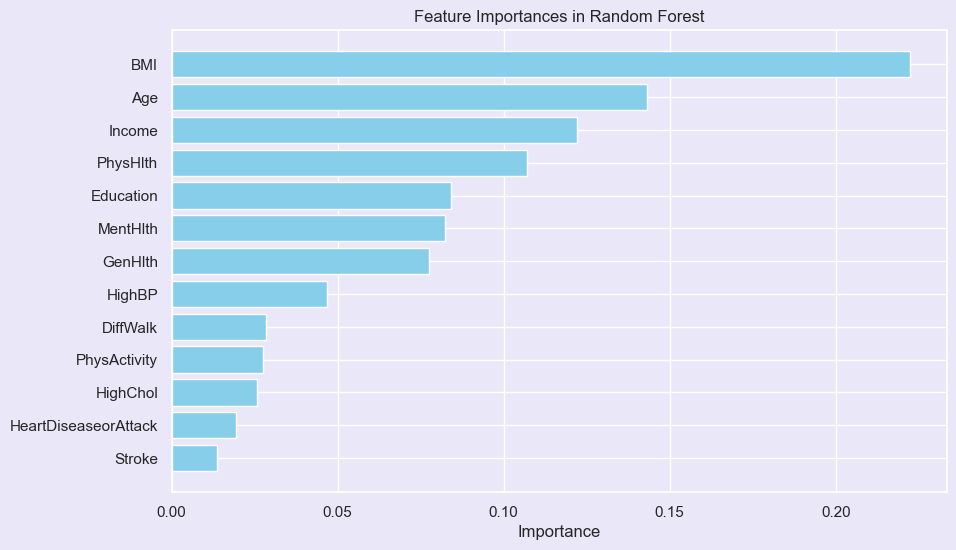

In [10]:
# Extract feature importances
feature_importances = model_rf.feature_importances_

# Get feature names (assuming X is a DataFrame)
feature_names = X.columns

# Create a DataFrame for visualization
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Print the sorted feature importances
print(importance_df)

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importances in Random Forest')
plt.gca().invert_yaxis()  # Invert y-axis to show the most important feature on top
plt.show()

### RF: Feature Importance and Interpretation

Key Influencers: 

BMI, Age, and Income are identified as the top three significant features, 

indicating that these factors are critical in the decision-making process of the model.


Moderate Factors: 

Features like PhysHlth, MentHlth, and Education provide additional predictive power but are not as influential as the top features.


Less Influential Features: 

HighBP, PhysActivity, DiffWalk, and HighChol have lower importance scores, indicating they are less critical in this model's predictions.

 
Implications:
 
Feature Selection: 

Focus on BMI, Age, and Income for further analysis, feature engineering, or interventions, as they hold the most predictive power.

Model Insights: 

The feature importances offer insights into the underlying patterns in the data, guiding decisions in healthcare or related fields.


Potential Actions: 

Consider whether less important features should be included, removed, 

or further examined for interactions or transformations to improve model performance.

#### Plot Confusion Matrix For Random Forest

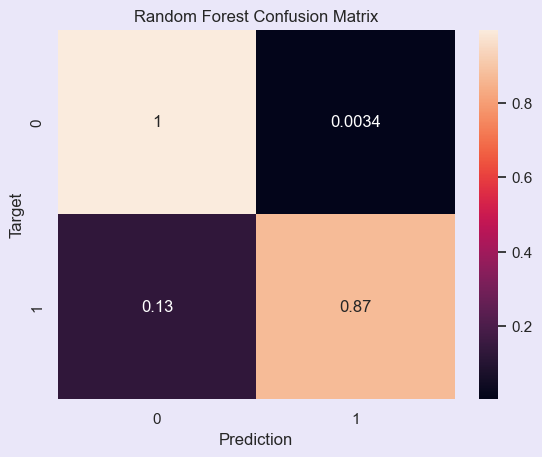

In [11]:
cf_rf = confusion_matrix(y_train, predictions_train_rf, normalize='true')
plt.figure()
sns.heatmap(cf_rf, annot=True)
plt.xlabel('Prediction')
plt.ylabel('Target')
plt.title('{} Confusion Matrix'.format("Random Forest"))
plt.show()

#### Calculate Evaluation Metrics for Random Forest

In [12]:
# Training set performance
rf_train_accuracy = accuracy_score(y_train, predictions_train_rf) # Calculate Accuracy
rf_train_f1 = f1_score(y_train, predictions_train_rf) # Calculate F1-score
rf_train_precision = precision_score(y_train, predictions_train_rf) # Calculate Precision
rf_train_recall = recall_score(y_train, predictions_train_rf) # Calculate Recall
rf_train_rocauc_score = roc_auc_score(y_train, predictions_train_rf)
rf_train_log_loss_value = log_loss(y_train, predictions_train_rf)


# Test set performance
rf_test_accuracy = accuracy_score(y_test, predictions_test_rf) # Calculate Accuracy
rf_test_f1 = f1_score(y_test, predictions_test_rf) # Calculate F1-score
rf_test_precision = precision_score(y_test, predictions_test_rf) # Calculate Precision
rf_test_recall = recall_score(y_test, predictions_test_rf) # Calculate Recall
rf_test_rocauc_score = roc_auc_score(y_test, predictions_test_rf) #Calculate Roc
rf_test_log_loss_value = log_loss(y_test, predictions_test_rf)

print('RF: Model performance for Training set')
print("- Accuracy: {:.4f}".format(rf_train_accuracy))
print('- F1 score: {:.4f}'.format(rf_train_f1))
print('- Precision: {:.4f}'.format(rf_train_precision))
print('- Recall: {:.4f}'.format(rf_train_recall))
print('- Roc Auc Score: {:.4f}'.format( rf_train_rocauc_score))
print('- Log Loss: {:.4f}'.format(rf_train_log_loss_value))

    
    
print('----------------------------------')
    
print('RF: Model performance for Test set')
print('- Accuracy: {:.4f}'.format(rf_test_accuracy))
print('- F1 score: {:.4f}'.format(rf_test_f1))
print('- Precision: {:.4f}'.format(rf_test_precision))
print('- Recall: {:.4f}'.format(rf_test_recall))
print('- Roc Auc Score: {:.4f}'.format(rf_test_rocauc_score))
print('- Log Loss: {:.4f}'.format(rf_test_log_loss_value))

    
print('='*35)
print('\n')

RF: Model performance for Training set
- Accuracy: 0.9789
- F1 score: 0.9203
- Precision: 0.9765
- Recall: 0.8702
- Roc Auc Score: 0.9334
- Log Loss: 0.7593
----------------------------------
RF: Model performance for Test set
- Accuracy: 0.8540
- F1 score: 0.2750
- Precision: 0.4361
- Recall: 0.2008
- Roc Auc Score: 0.5796
- Log Loss: 5.2635




#### RF: Classification Report


In [13]:
cm_rf_train = classification_report(y_train,predictions_train_rf)

print('Random Forest Model: Train\n')
print(cm_rf_train)

cm_rf_test = classification_report(y_test,predictions_test_rf)

print('Random Forest Model: Test\n')
print(cm_rf_test)

Random Forest Model: Train

              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99    174595
         1.0       0.98      0.87      0.92     28349

    accuracy                           0.98    202944
   macro avg       0.98      0.93      0.95    202944
weighted avg       0.98      0.98      0.98    202944

Random Forest Model: Test

              precision    recall  f1-score   support

         0.0       0.88      0.96      0.92     43739
         1.0       0.44      0.20      0.27      6997

    accuracy                           0.85     50736
   macro avg       0.66      0.58      0.60     50736
weighted avg       0.82      0.85      0.83     50736



#### RF: N-fold cross-validation

In [20]:
n_splits = 5

skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

X = cdc_data[selected_features_cdc_data]
y = cdc_data['Diabetes_binary']

model_rf = RandomForestClassifier()

# Arrays to store accuracy scores
training_accuracies = []
testing_accuracies = []

# Arrays to store f1 scores
training_f1 = []
testing_f1 = []

# Arrays to store Precision scores
training_precision = []
testing_precision = []

# Arrays to store Recall scores
training_recall = []
testing_recall = []

# Arrays to store RO-AUC scores
training_rocauc_score = []
testing_rocauc_score = []

# Arrays to store Log Loss scores
training_log_loss_value = []
testing_log_loss_value = []

# Perform cross-validation
for train_index, test_index in skf.split(X, y):
    # Split the data into training and test sets for this fold
    X_train_kfold, X_test_kfold = X.iloc[train_index], X.iloc[test_index]
    y_train_kfold, y_test_kfold = y.iloc[train_index], y.iloc[test_index]
    
    # Train the model
    model_rf.fit(X_train_kfold, y_train_kfold)
    
    # Predict on training and test data
    pred_train_rf_kfold = model_rf.predict(X_train_kfold)
    pred_test_rf_kfold = model_rf.predict(X_test_kfold)
    
    # Calculate accuracy
    train_accuracy = accuracy_score(y_train_kfold, pred_train_rf_kfold)
    test_accuracy = accuracy_score(y_test_kfold, pred_test_rf_kfold)
    
    # Store the accuracy scores
    training_accuracies.append(train_accuracy)
    testing_accuracies.append(test_accuracy)

    # Calculate f1
    train_f1 = f1_score(y_train_kfold, pred_train_rf_kfold)
    test_f1 = f1_score(y_test_kfold, pred_test_rf_kfold)
    
    # Store the f1 scores
    training_f1.append(train_f1)
    testing_f1.append(test_f1)

    # Calculate Precision
    train_precision_score = precision_score(y_train_kfold, pred_train_rf_kfold)
    test_precision_score = precision_score(y_test_kfold, pred_test_rf_kfold)
    
    # Store the Precision scores
    training_precision.append(train_precision_score)
    testing_precision.append(test_precision_score)

    # Calculate recall
    train_recall_score = recall_score(y_train_kfold, pred_train_rf_kfold)
    test_recall_score = recall_score(y_test_kfold, pred_test_rf_kfold)
    
    # Store the recall scores
    training_recall.append(train_recall_score)
    testing_recall.append(test_recall_score)

    # Calculate RO-AUC
    train_roc_auc_score = roc_auc_score(y_train_kfold, pred_train_rf_kfold)
    test_roc_auc_score = roc_auc_score(y_test_kfold, pred_test_rf_kfold)
    
    # Store the RO-AUC scores
    training_rocauc_score.append(train_roc_auc_score)
    testing_rocauc_score.append(test_roc_auc_score)

    # Calculate Log Loss
    train_log_loss = log_loss(y_train_kfold, pred_train_rf_kfold)
    test_log_loss = log_loss(y_test_kfold, pred_test_rf_kfold)
    
    # Store the Log Loss
    training_log_loss_value.append(train_log_loss)
    testing_log_loss_value.append(test_log_loss)


# Calculate mean and standard deviation of accuracies
mean_train_accuracy_iter1 = np.mean(training_accuracies)
std_train_accuracy_iter1 = np.std(training_accuracies)
mean_test_accuracy_iter1 = np.mean(testing_accuracies)
std_test_accuracy_iter1 = np.std(testing_accuracies)

# Print results
print("\n")
print("="*50)
print(f"Training Accuracy: {mean_train_accuracy_iter1:.2f} ± {std_train_accuracy_iter1:.2f}")
print(f"Test Accuracy: {mean_test_accuracy_iter1:.2f} ± {std_test_accuracy_iter1:.2f}")
print("="*50)

# Calculate mean and standard deviation of f1 scores

mean_train_f1_iter1 = np.mean(training_f1)
std_train_f1_iter1 = np.std(training_f1)
mean_test_f1_iter1 = np.mean(testing_f1)
std_test_f1_iter1 = np.std(testing_f1)

# Print results
print("\n")
print("="*50)
print(f"Training F1: {mean_train_f1_iter1:.2f} ± {std_train_f1_iter1:.2f}")
print(f"Test F1: {mean_test_f1_iter1:.2f} ± {std_test_f1_iter1:.2f}")
print("="*50)

# Calculate mean and standard deviation of Precision scores

mean_train_precision_iter1 = np.mean(training_precision)
std_train_precision_iter1 = np.std(training_precision)
mean_test_precision_iter1 = np.mean(testing_precision)
std_test_precision_iter1 = np.std(testing_precision)

# Print results
print("\n")
print("="*50)
print(f"Training Precision: {mean_train_precision_iter1:.2f} ± {std_train_precision_iter1:.2f}")
print(f"Test Precision: {mean_test_precision_iter1:.2f} ± {std_test_precision_iter1:.2f}")
print("="*50)

# Calculate mean and standard deviation of Recall scores

mean_train_recall_iter1 = np.mean(training_recall)
std_train_recall_iter1 = np.std(training_recall)
mean_test_recall_iter1 = np.mean(testing_recall)
std_test_recall_iter1 = np.std(testing_recall)

# Print results
print("\n")
print("="*50)
print(f"Training Recall: {mean_train_recall_iter1:.2f} ± {std_train_recall_iter1:.2f}")
print(f"Test Recall: {mean_test_recall_iter1:.2f} ± {std_test_recall_iter1:.2f}")
print("="*50)

# Calculate mean and standard deviation of RO-AUC scores

mean_train_rocauc_score_iter1 = np.mean(training_rocauc_score)
std_train_rocauc_score_iter1 = np.std(training_rocauc_score)
mean_test_rocauc_score_iter1 = np.mean(testing_rocauc_score)
std_test_rocauc_score_iter1 = np.std(testing_rocauc_score)

# Print results
print("\n")
print("="*50)
print(f"Training RO-AUC: {mean_train_rocauc_score_iter1:.2f} ± {std_train_rocauc_score_iter1:.2f}")
print(f"Test RO-AUC: {mean_test_rocauc_score_iter1:.2f} ± {std_test_rocauc_score_iter1:.2f}")
print("="*50)

# Calculate mean and standard deviation of Log Loss scores
mean_train_log_loss_value_iter1 = np.mean(training_log_loss_value)
std_train_log_loss_value_iter1 = np.std(training_log_loss_value)
mean_test_log_loss_value_iter1 = np.mean(testing_log_loss_value)
std_test_log_loss_value_iter1 = np.std(testing_log_loss_value)

# Print results
print("\n")
print("="*50)
print(f"Training Log Loss: {mean_train_log_loss_value_iter1:.2f} ± {std_train_log_loss_value_iter1:.2f}")
print(f"Test Log Loss: {mean_test_log_loss_value_iter1:.2f} ± {std_test_log_loss_value_iter1:.2f}")
print("="*50)





Training Accuracy: 0.98 ± 0.00
Test Accuracy: 0.85 ± 0.00


Training F1: 0.92 ± 0.00
Test F1: 0.27 ± 0.01


Training Precision: 0.98 ± 0.00
Test Precision: 0.44 ± 0.00


Training Recall: 0.87 ± 0.00
Test Recall: 0.20 ± 0.01


Training RO-AUC: 0.93 ± 0.00
Test RO-AUC: 0.58 ± 0.00


Training Log Loss: 0.76 ± 0.01
Test Log Loss: 5.31 ± 0.01


In [19]:
print("mean_train_accuracy_iter1",mean_train_accuracy_iter1)
print("mean_test_accuracy_iter1",mean_test_accuracy_iter1)
print("mean_train_f1_iter1",mean_train_f1_iter1)
print("mean_test_f1_iter1",mean_test_f1_iter1)
print("mean_train_precision_iter1",mean_train_precision_iter1)
print("mean_test_precision_iter1",mean_test_precision_iter1)
print("mean_train_recall_iter1",mean_train_recall_iter1)
print("mean_test_recall_iter1",mean_test_recall_iter1)
print("mean_train_rocauc_score_iter1",mean_train_rocauc_score_iter1)
print("mean_test_rocauc_score_iter1",mean_test_rocauc_score_iter1)
print("mean_train_log_loss_value_iter1",mean_train_log_loss_value_iter1)
print("mean_test_log_loss_value_iter1",mean_test_log_loss_value_iter1)


mean_train_accuracy_iter1 0.9790099731945758
mean_test_accuracy_iter1 0.8527869757174393
mean_train_f1_iter1 0.9202650338009339
mean_test_f1_iter1 0.27351471417685425
mean_train_precision_iter1 0.9775172927885404
mean_test_precision_iter1 0.4377802824015992
mean_train_recall_iter1 0.8693487223652729
mean_test_recall_iter1 0.19891923278781815
mean_train_rocauc_score_iter1 0.933055854695884
mean_test_rocauc_score_iter1 0.5787802907466263
mean_train_log_loss_value_iter1 0.7565572508029865
mean_test_log_loss_value_iter1 5.306095221604305


<a id="8.1"></a>
# <div style="padding:20px;color:white;margin:0;color:darkcyan;font-size:20px;font-family:Georgia;text-align:left;display:fill;border-radius:5px;background-color:#E0FFFF;overflow:hidden">8.1 | Model Development: CDC Data: Random Forest: First Iteration: Conclusions</div>

<div style="background-color:white;font-size:15px;font-family:Georgia;border-style: solid;border-color: #254E58;border-width:3px;padding:10px;margin: 1px;color:#254E58;overflow:hidden"> <b>Evaluate: Logistic Regression Model</b><br>

Training Accuracy: 0.98 ± 0.00 : Test Accuracy: 0.85 ± 0.00

Training F1: 0.92 ± 0.00 : Test F1: 0.27 ± 0.00

Training Precision: 0.98 ± 0.00 : Test Precision: 0.44 ± 0.00

Training Recall: 0.87 ± 0.00 : Test Recall: 0.20 ± 0.00

Training RO-AUC: 0.93 ± 0.00 : Test RO-AUC: 0.58 ± 0.00

Training Log Loss: 0.76 ± 0.01 : Test Log Loss: 5.30 ± 0.02

</div>

<div style="background-color:white;font-size:15px;font-family:Georgia;border-style: solid;border-color: #254E58;border-width:3px;padding:10px;margin: 1px;color:#254E58;overflow:hidden">

<b>Overall Conclusions:</b>
  
Overfitting: 

The model likely overfits the training data, capturing noise and specifics that do not generalize well. 

This is evidenced by the large discrepancies between training and test metrics.


Complexity: 

The logistic regression model may be too complex, or the features may not be well-suited, leading to overfitting in the training data and poor generalization.


Model Calibration and Discrimination: 

The high test log loss and low ROC AUC suggest that the model's probability estimates are poorly calibrated and 

it struggles to distinguish between classes.
 
Recommendations for Improvement:
 
Regularization and Simplification:

Consider using regularization to penalize complex models and reduce overfitting. Experiment with simpler models or reducing feature complexity.

Addressing Overfitting:

Use cross-validation techniques to better estimate generalization performance and avoid overfitting.

Explore ensemble techniques that provide robustness against overfitting, such as using different subsets of features or samples.

Data Augmentation and Balancing:

If the dataset is imbalanced, consider techniques like resampling, SMOTE, 
or adjusting class weights to improve model sensitivity to the minority class.

</div>

<a id="8.2"></a>
# <div style="padding:20px;color:white;margin:0;color:darkcyan;font-size:20px;font-family:Georgia;text-align:left;display:fill;border-radius:5px;background-color:#E0FFFF;overflow:hidden">8.2 | Model Development: CDC Data: Random Forest: Second Iteration</div>

Random Forest is a robust and flexible model that offers significant advantages, 
especially when dealing with complex datasets with non-linear relationships. 

By addressing issues like overfitting, class imbalance, and probability calibration through tuning and data preprocessing, 

Random Forest can achieve strong performance and provide valuable insights into feature importance. 

### Balance Class

In [21]:
from imblearn.over_sampling import SMOTE

n_splits = 5
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

model_rf = RandomForestClassifier(random_state=42)

# SMOTE for balancing the classes
smote = SMOTE(random_state=42)

# Arrays to store metrics
training_accuracies, testing_accuracies = [], []
training_f1, testing_f1 = [], []
training_precision, testing_precision = [], []
training_recall, testing_recall = [], []
training_rocauc_score, testing_rocauc_score = [], []
training_log_loss_value, testing_log_loss_value = [], []

# Perform cross-validation
for train_index, test_index in skf.split(X, y):
    # Split the data into training and test sets for this fold
    X_train_kfold, X_test_kfold = X.iloc[train_index], X.iloc[test_index]
    y_train_kfold, y_test_kfold = y.iloc[train_index], y.iloc[test_index]
    
    # Apply SMOTE to the training data
    X_train_kfold, y_train_kfold = smote.fit_resample(X_train_kfold, y_train_kfold)
    
    # Train the model
    model_rf.fit(X_train_kfold, y_train_kfold)
    
    # Predict on training and test data
    pred_train_rf_kfold = model_rf.predict(X_train_kfold)
    pred_test_rf_kfold = model_rf.predict(X_test_kfold)
    
    # Calculate and store metrics
    training_accuracies.append(accuracy_score(y_train_kfold, pred_train_rf_kfold))
    testing_accuracies.append(accuracy_score(y_test_kfold, pred_test_rf_kfold))
    training_f1.append(f1_score(y_train_kfold, pred_train_rf_kfold))
    testing_f1.append(f1_score(y_test_kfold, pred_test_rf_kfold))
    training_precision.append(precision_score(y_train_kfold, pred_train_rf_kfold))
    testing_precision.append(precision_score(y_test_kfold, pred_test_rf_kfold))
    training_recall.append(recall_score(y_train_kfold, pred_train_rf_kfold))
    testing_recall.append(recall_score(y_test_kfold, pred_test_rf_kfold))
    training_rocauc_score.append(roc_auc_score(y_train_kfold, model_rf.predict_proba(X_train_kfold)[:, 1]))
    testing_rocauc_score.append(roc_auc_score(y_test_kfold, model_rf.predict_proba(X_test_kfold)[:, 1]))
    training_log_loss_value.append(log_loss(y_train_kfold, model_rf.predict_proba(X_train_kfold)[:, 1]))
    testing_log_loss_value.append(log_loss(y_test_kfold, model_rf.predict_proba(X_test_kfold)[:, 1]))


# Calculate mean and standard deviation of accuracies
mean_train_accuracy_iter2 = np.mean(training_accuracies)
std_train_accuracy_iter2 = np.std(training_accuracies)
mean_test_accuracy_iter2 = np.mean(testing_accuracies)
std_test_accuracy_iter2 = np.std(testing_accuracies)

# Print results
print("\n")
print("="*50)
print(f"Training Accuracy: {mean_train_accuracy_iter2:.2f} ± {std_train_accuracy_iter2:.2f}")
print(f"Test Accuracy: {mean_test_accuracy_iter2:.2f} ± {std_test_accuracy_iter2:.2f}")
print("="*50)

# Calculate mean and standard deviation of f1 scores

mean_train_f1_iter2 = np.mean(training_f1)
std_train_f1_iter2 = np.std(training_f1)
mean_test_f1_iter2 = np.mean(testing_f1)
std_test_f1_iter2 = np.std(testing_f1)

# Print results
print("\n")
print("="*50)
print(f"Training F1: {mean_train_f1_iter2:.2f} ± {std_train_f1_iter2:.2f}")
print(f"Test F1: {mean_test_f1_iter2:.2f} ± {std_test_f1_iter2:.2f}")
print("="*50)

# Calculate mean and standard deviation of Precision scores

mean_train_precision_iter2 = np.mean(training_precision)
std_train_precision_iter2 = np.std(training_precision)
mean_test_precision_iter2 = np.mean(testing_precision)
std_test_precision_iter2 = np.std(testing_precision)

# Print results
print("\n")
print("="*50)
print(f"Training Precision: {mean_train_precision_iter2:.2f} ± {std_train_precision_iter2:.2f}")
print(f"Test Precision: {mean_test_precision_iter2:.2f} ± {std_test_precision_iter2:.2f}")
print("="*50)

# Calculate mean and standard deviation of Recall scores

mean_train_recall_iter2 = np.mean(training_recall)
std_train_recall_iter2 = np.std(training_recall)
mean_test_recall_iter2 = np.mean(testing_recall)
std_test_recall_iter2 = np.std(testing_recall)

# Print results
print("\n")
print("="*50)
print(f"Training Recall: {mean_train_recall_iter2:.2f} ± {std_train_recall_iter2:.2f}")
print(f"Test Recall: {mean_test_recall_iter2:.2f} ± {std_test_recall_iter2:.2f}")
print("="*50)

# Calculate mean and standard deviation of RO-AUC scores

mean_train_rocauc_score_iter2 = np.mean(training_rocauc_score)
std_train_rocauc_score_iter2 = np.std(training_rocauc_score)
mean_test_rocauc_score_iter2 = np.mean(testing_rocauc_score)
std_test_rocauc_score_iter2 = np.std(testing_rocauc_score)

# Print results
print("\n")
print("="*50)
print(f"Training RO-AUC: {mean_train_rocauc_score_iter2:.2f} ± {std_train_rocauc_score_iter2:.2f}")
print(f"Test RO-AUC: {mean_test_rocauc_score_iter2:.2f} ± {std_test_rocauc_score_iter2:.2f}")
print("="*50)

# Calculate mean and standard deviation of Log Loss scores
mean_train_log_loss_value_iter2 = np.mean(training_log_loss_value)
std_train_log_loss_value_iter2 = np.std(training_log_loss_value)
mean_test_log_loss_value_iter2 = np.mean(testing_log_loss_value)
std_test_log_loss_value_iter2 = np.std(testing_log_loss_value)

# Print results
print("\n")
print("="*50)
print(f"Training Log Loss: {mean_train_log_loss_value_iter2:.2f} ± {std_train_log_loss_value_iter2:.2f}")
print(f"Test Log Loss: {mean_test_log_loss_value_iter2:.2f} ± {std_test_log_loss_value_iter2:.2f}")
print("="*50)



Training Accuracy: 0.99 ± 0.00
Test Accuracy: 0.85 ± 0.00


Training F1: 0.99 ± 0.00
Test F1: 0.29 ± 0.00


Training Precision: 0.99 ± 0.00
Test Precision: 0.41 ± 0.00


Training Recall: 0.98 ± 0.00
Test Recall: 0.23 ± 0.00


Training RO-AUC: 1.00 ± 0.00
Test RO-AUC: 0.77 ± 0.00


Training Log Loss: 0.07 ± 0.00
Test Log Loss: 0.59 ± 0.01


<a id="8.2"></a>
# <div style="padding:20px;color:white;margin:0;color:darkcyan;font-size:20px;font-family:Georgia;text-align:left;display:fill;border-radius:5px;background-color:#E0FFFF;overflow:hidden">8.2 | Model Development: CDC Data: Random Forest: Second Iteration: Conclusions</div>

<div style="background-color:white;font-size:15px;font-family:Georgia;border-style: solid;border-color: #254E58;border-width:3px;padding:10px;margin: 1px;color:#254E58;overflow:hidden"> <b>Evaluate: Random Forest Model</b><br>

Training Accuracy: 0.99 ± 0.00 : Test Accuracy: 0.85 ± 0.00

Training F1: 0.99 ± 0.00 : Test F1: 0.29 ± 0.00

Training Precision: 0.99 ± 0.00 : Test Precision: 0.41 ± 0.00

Training Recall: 0.98 ± 0.00 : Test Recall: 0.23 ± 0.00

Training RO-AUC: 1.00 ± 0.00 : Test RO-AUC: 0.77 ± 0.00

Training Log Loss: 0.07 ± 0.00 : Test Log Loss: 0.59 ± 0.01

</div>

<div style="background-color:white;font-size:15px;font-family:Georgia;border-style: solid;border-color: #254E58;border-width:3px;padding:10px;margin: 1px;color:#254E58;overflow:hidden">

<b>Overall Conclusions:</b>
  
Overfitting: 

The Random Forest model exhibits overfitting, performing exceptionally well on training data but failing to generalize to test data. 

This is evident from the stark contrast between training and test metrics, particularly in F1 score and recall.


Complexity: 

The model complexity may be too high, with numerous trees capturing noise in the training data, leading to poor generalization.


Model Calibration and Discrimination: 

While the training RO-AUC is perfect, the test RO-AUC and higher test log loss indicate issues with probability calibration and class separation.


Recommendations for Improvement:
 
Regularization and Pruning:

Limit the depth of trees, reduce the number of trees, or increase the minimum samples for splitting to mitigate overfitting.


</div>

<a id="8.3"></a>
# <div style="padding:20px;color:white;margin:0;color:darkcyan;font-size:20px;font-family:Georgia;text-align:left;display:fill;border-radius:5px;background-color:#E0FFFF;overflow:hidden">8.3 | Model Development: CDC Data: Random Forest: Third Iteration</div>

### HyperParameter Tuning: GridSearchCV

In [16]:
from imblearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid
param_grid = {
    'randomforestclassifier__n_estimators': [100, 200, 300],
    'randomforestclassifier__max_depth': [None, 10, 20, 30],
    'randomforestclassifier__min_samples_split': [2, 5, 10],
    'randomforestclassifier__min_samples_leaf': [1, 2, 4],
    'randomforestclassifier__max_features': ['auto', 'sqrt', 'log2'],
}

# Create a pipeline with SMOTE and RandomForestClassifier
pipeline = Pipeline(steps=[
    ('smote', SMOTE(random_state=42)),
    ('randomforestclassifier', RandomForestClassifier(random_state=42))
])

# Define the cross-validation strategy
cv = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, scoring=make_scorer(f1_score), cv=cv, n_jobs=-1)

# Fit GridSearchCV
grid_search.fit(X, y)

# Print the best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best F1 Score:", grid_search.best_score_)

# Use the best estimator to evaluate on the full dataset
best_model = grid_search.best_estimator_

# Perform cross-validation again using the best model for detailed metrics
for train_index, test_index in cv.split(X, y):
    X_train_kfold, X_test_kfold = X.iloc[train_index], X.iloc[test_index]
    y_train_kfold, y_test_kfold = y.iloc[train_index], y.iloc[test_index]
    
    # Resample the training data with SMOTE
    X_train_kfold, y_train_kfold = smote.fit_resample(X_train_kfold, y_train_kfold)
    
    # Train the best model
    best_model.fit(X_train_kfold, y_train_kfold)
    
    # Predict on training and test data
    pred_train_rf_kfold = best_model.predict(X_train_kfold)
    pred_test_rf_kfold = best_model.predict(X_test_kfold)
    
    # Calculate and store metrics
    training_accuracies.append(accuracy_score(y_train_kfold, pred_train_rf_kfold))
    testing_accuracies.append(accuracy_score(y_test_kfold, pred_test_rf_kfold))
    training_f1.append(f1_score(y_train_kfold, pred_train_rf_kfold))
    testing_f1.append(f1_score(y_test_kfold, pred_test_rf_kfold))
    training_precision.append(precision_score(y_train_kfold, pred_train_rf_kfold))
    testing_precision.append(precision_score(y_test_kfold, pred_test_rf_kfold))
    training_recall.append(recall_score(y_train_kfold, pred_train_rf_kfold))
    testing_recall.append(recall_score(y_test_kfold, pred_test_rf_kfold))
    training_rocauc_score.append(roc_auc_score(y_train_kfold, best_model.predict_proba(X_train_kfold)[:, 1]))
    testing_rocauc_score.append(roc_auc_score(y_test_kfold, best_model.predict_proba(X_test_kfold)[:, 1]))
    training_log_loss_value.append(log_loss(y_train_kfold, best_model.predict_proba(X_train_kfold)[:, 1]))
    testing_log_loss_value.append(log_loss(y_test_kfold, best_model.predict_proba(X_test_kfold)[:, 1]))

# Calculate and print mean and standard deviation of all metrics
metrics = {
    "Accuracy": (training_accuracies, testing_accuracies),
    "F1": (training_f1, testing_f1),
    "Precision": (training_precision, testing_precision),
    "Recall": (training_recall, testing_recall),
    "RO-AUC": (training_rocauc_score, testing_rocauc_score),
    "Log Loss": (training_log_loss_value, testing_log_loss_value)
}

for metric_name, (train_scores, test_scores) in metrics.items():
    mean_train = np.mean(train_scores)
    std_train = np.std(train_scores)
    mean_test = np.mean(test_scores)
    std_test = np.std(test_scores)
    
    print("\n")
    print("="*50)
    print(f"Training {metric_name}: {mean_train:.2f} ± {std_train:.2f}")
    print(f"Test {metric_name}: {mean_test:.2f} ± {std_test:.2f}")
    print("="*50)

KeyboardInterrupt: 

In [22]:
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE

# Best parameters from GridSearchCV
best_params = {
    'n_estimators': 100,
    'max_depth': 10,
    'min_samples_split': 5,
    'min_samples_leaf': 1,
    'max_features': 'sqrt'
}

# Create a pipeline with SMOTE and RandomForestClassifier using best parameters
pipeline = Pipeline(steps=[
    ('smote', SMOTE(random_state=42)),
    ('randomforestclassifier', RandomForestClassifier(**best_params, random_state=42))
])

# Define the cross-validation strategy
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Arrays to store metrics
training_accuracies, testing_accuracies = [], []
training_f1, testing_f1 = [], []
training_precision, testing_precision = [], []
training_recall, testing_recall = [], []
training_rocauc_score, testing_rocauc_score = [], []
training_log_loss_value, testing_log_loss_value = [], []

# Perform cross-validation
for train_index, test_index in cv.split(X, y):
    X_train_kfold, X_test_kfold = X.iloc[train_index], X.iloc[test_index]
    y_train_kfold, y_test_kfold = y.iloc[train_index], y.iloc[test_index]
    
    # Resample the training data with SMOTE
    X_train_kfold, y_train_kfold = pipeline.named_steps['smote'].fit_resample(X_train_kfold, y_train_kfold)
    
    # Train the model using the best parameters
    pipeline.named_steps['randomforestclassifier'].fit(X_train_kfold, y_train_kfold)
    
    # Predict on training and test data
    pred_train_rf_kfold = pipeline.named_steps['randomforestclassifier'].predict(X_train_kfold)
    pred_test_rf_kfold = pipeline.named_steps['randomforestclassifier'].predict(X_test_kfold)
    
    # Calculate and store metrics
    training_accuracies.append(accuracy_score(y_train_kfold, pred_train_rf_kfold))
    testing_accuracies.append(accuracy_score(y_test_kfold, pred_test_rf_kfold))
    training_f1.append(f1_score(y_train_kfold, pred_train_rf_kfold))
    testing_f1.append(f1_score(y_test_kfold, pred_test_rf_kfold))
    training_precision.append(precision_score(y_train_kfold, pred_train_rf_kfold))
    testing_precision.append(precision_score(y_test_kfold, pred_test_rf_kfold))
    training_recall.append(recall_score(y_train_kfold, pred_train_rf_kfold))
    testing_recall.append(recall_score(y_test_kfold, pred_test_rf_kfold))
    training_rocauc_score.append(roc_auc_score(y_train_kfold, pipeline.named_steps['randomforestclassifier'].predict_proba(X_train_kfold)[:, 1]))
    testing_rocauc_score.append(roc_auc_score(y_test_kfold, pipeline.named_steps['randomforestclassifier'].predict_proba(X_test_kfold)[:, 1]))
    training_log_loss_value.append(log_loss(y_train_kfold, pipeline.named_steps['randomforestclassifier'].predict_proba(X_train_kfold)[:, 1]))
    testing_log_loss_value.append(log_loss(y_test_kfold, pipeline.named_steps['randomforestclassifier'].predict_proba(X_test_kfold)[:, 1]))


# Calculate mean and standard deviation of accuracies
mean_train_accuracy_iter3 = np.mean(training_accuracies)
std_train_accuracy_iter3 = np.std(training_accuracies)
mean_test_accuracy_iter3 = np.mean(testing_accuracies)
std_test_accuracy_iter3 = np.std(testing_accuracies)

# Print results
print("\n")
print("="*50)
print(f"Training Accuracy: {mean_train_accuracy_iter3:.2f} ± {std_train_accuracy_iter3:.2f}")
print(f"Test Accuracy: {mean_test_accuracy_iter3:.2f} ± {std_test_accuracy_iter3:.2f}")
print("="*50)

# Calculate mean and standard deviation of f1 scores

mean_train_f1_iter3 = np.mean(training_f1)
std_train_f1_iter3 = np.std(training_f1)
mean_test_f1_iter3 = np.mean(testing_f1)
std_test_f1_iter3 = np.std(testing_f1)

# Print results
print("\n")
print("="*50)
print(f"Training F1: {mean_train_f1_iter3:.2f} ± {std_train_f1_iter3:.2f}")
print(f"Test F1: {mean_test_f1_iter3:.2f} ± {std_test_f1_iter3:.2f}")
print("="*50)

# Calculate mean and standard deviation of Precision scores

mean_train_precision_iter3 = np.mean(training_precision)
std_train_precision_iter3 = np.std(training_precision)
mean_test_precision_iter3 = np.mean(testing_precision)
std_test_precision_iter3 = np.std(testing_precision)

# Print results
print("\n")
print("="*50)
print(f"Training Precision: {mean_train_precision_iter3:.2f} ± {std_train_precision_iter3:.2f}")
print(f"Test Precision: {mean_test_precision_iter3:.2f} ± {std_test_precision_iter3:.2f}")
print("="*50)

# Calculate mean and standard deviation of Recall scores

mean_train_recall_iter3 = np.mean(training_recall)
std_train_recall_iter3 = np.std(training_recall)
mean_test_recall_iter3 = np.mean(testing_recall)
std_test_recall_iter3 = np.std(testing_recall)

# Print results
print("\n")
print("="*50)
print(f"Training Recall: {mean_train_recall_iter3:.2f} ± {std_train_recall_iter3:.2f}")
print(f"Test Recall: {mean_test_recall_iter3:.2f} ± {std_test_recall_iter3:.2f}")
print("="*50)

# Calculate mean and standard deviation of RO-AUC scores

mean_train_rocauc_score_iter3 = np.mean(training_rocauc_score)
std_train_rocauc_score_iter3 = np.std(training_rocauc_score)
mean_test_rocauc_score_iter3 = np.mean(testing_rocauc_score)
std_test_rocauc_score_iter3 = np.std(testing_rocauc_score)

# Print results
print("\n")
print("="*50)
print(f"Training RO-AUC: {mean_train_rocauc_score_iter3:.2f} ± {std_train_rocauc_score_iter3:.2f}")
print(f"Test RO-AUC: {mean_test_rocauc_score_iter3:.2f} ± {std_test_rocauc_score_iter3:.2f}")
print("="*50)

# Calculate mean and standard deviation of Log Loss scores
mean_train_log_loss_value_iter3 = np.mean(training_log_loss_value)
std_train_log_loss_value_iter3 = np.std(training_log_loss_value)
mean_test_log_loss_value_iter3 = np.mean(testing_log_loss_value)
std_test_log_loss_value_iter3 = np.std(testing_log_loss_value)

# Print results
print("\n")
print("="*50)
print(f"Training Log Loss: {mean_train_log_loss_value_iter3:.2f} ± {std_train_log_loss_value_iter3:.2f}")
print(f"Test Log Loss: {mean_test_log_loss_value_iter3:.2f} ± {std_test_log_loss_value_iter3:.2f}")
print("="*50)



Training Accuracy: 0.85 ± 0.00
Test Accuracy: 0.81 ± 0.00


Training F1: 0.86 ± 0.00
Test F1: 0.44 ± 0.00


Training Precision: 0.85 ± 0.00
Test Precision: 0.37 ± 0.00


Training Recall: 0.86 ± 0.00
Test Recall: 0.55 ± 0.01


Training RO-AUC: 0.94 ± 0.00
Test RO-AUC: 0.81 ± 0.00


Training Log Loss: 0.33 ± 0.00
Test Log Loss: 0.40 ± 0.00


<div style="background-color:white;font-size:15px;font-family:Georgia;border-style: solid;border-color: #254E58;border-width:3px;padding:10px;margin: 1px;color:#254E58;overflow:hidden"> <b>Evaluate: Random Forest Model</b><br>

Training Accuracy: 0.85 ± 0.00 : Test Accuracy: 0.81 ± 0.00

Training F1: 0.86 ± 0.00 : Test F1: 0.44 ± 0.00

Training Precision: 0.85 ± 0.00 : Test Precision: 0.37 ± 0.00

Training Recall: 0.86 ± 0.00 : Test Recall: 0.55 ± 0.01

Training RO-AUC: 0.94 ± 0.00 : Test RO-AUC: 0.81 ± 0.00

Training Log Loss: 0.33 ± 0.00 : Test Log Loss: 0.40 ± 0.00

</div>

<div style="background-color:white;font-size:15px;font-family:Georgia;border-style: solid;border-color: #254E58;border-width:3px;padding:10px;margin: 1px;color:#254E58;overflow:hidden">

<b>Overall Conclusions:</b>
  
Performance Balance: 

The Random Forest model shows good balance between training and test accuracy, indicating effective generalization with minimal overfitting. 

However, the drop in F1 score and precision on the test set highlights the need for better precision-recall balance.


Precision Challenges: 

The significant drop in precision on the test set suggests many false positives, indicating the need for techniques to reduce them.


Model Calibration and Discrimination: 

The strong RO-AUC on both training and test sets suggests good class discrimination, while the low log loss indicates well-calibrated probabilities.


Recommendations for Improvement:
 
Precision Enhancement:

Adjust the decision threshold or use cost-sensitive learning to improve the balance between precision and recall.


</div>

<a id="8"></a>
# <div style="padding:20px;color:white;margin:0;color:darkgreen;font-size:30px;font-family:Georgia;text-align:left;display:fill;border-radius:5px;background-color:#f2ffe6;overflow:hidden">8. | Model Development: CDC Data: Random Forest: Summary</div>

<a id=""></a>
# <div style="padding:20px;color:white;margin:0;color:darkcyan;font-size:20px;font-family:Georgia;text-align:left;display:fill;border-radius:5px;background-color:#E0FFFF;overflow:hidden">Model Development: CDC Data: Improvements Through Iterations</div>

In [18]:
print('mean_train_accuracy_rf_iter3:', mean_train_accuracy_iter3)
print('std_train_accuracy_rf_iter3:', std_train_accuracy_iter3)
print('mean_test_accuracy_rf_iter3:', mean_test_accuracy_iter3)
print('std_test_accuracy_rf_iter3:', std_test_accuracy_iter3)
print('mean_train_f1_rf_iter3:', mean_train_f1_iter3)
print('std_train_f1_rf_iter3:', std_train_f1_iter3)
print('mean_test_f1_rf_iter3:', mean_test_f1_iter3)
print('std_test_f1_rf_iter3:', std_test_f1_iter3)
print('mean_train_precision_rf_iter3:', mean_train_precision_iter3)
print('std_train_precision_rf_iter3:', std_train_precision_iter3)
print('mean_test_precision_rf_iter3:', mean_test_precision_iter3)
print('std_test_precision_rf_iter3:', std_test_precision_iter3)
print('mean_train_recall_rf_iter3:', mean_train_recall_iter3)
print('std_train_recall_rf_iter3:', std_train_recall_iter3)
print('mean_test_recall_rf_iter3:', mean_test_recall_iter3)
print('std_test_recall_rf_iter3:', std_test_recall_iter3)
print('mean_train_rocauc_score_rf_iter3:', mean_train_rocauc_score_iter3)
print('std_train_rocauc_score_rf_iter3:', std_train_rocauc_score_iter3)
print('mean_test_rocauc_score_rf_iter3:', mean_test_rocauc_score_iter3)
print('std_test_rocauc_score_rf_iter3:', std_test_rocauc_score_iter3)
print('mean_train_log_loss_value_rf_iter3:', mean_train_log_loss_value_iter3)
print('std_train_log_loss_value_rf_iter3:', std_train_log_loss_value_iter3)
print('mean_test_log_loss_value_rf_iter3:', mean_test_log_loss_value_iter3)
print('std_test_log_loss_value_rf_iter3:', std_test_log_loss_value_iter3)

mean_train_accuracy_rf_iter3: 0.8546189539432515
std_train_accuracy_rf_iter3: 0.0009207565783173383
mean_test_accuracy_rf_iter3: 0.8076434878587196
std_test_accuracy_rf_iter3: 0.0014766153162475307
mean_train_f1_rf_iter3: 0.8552696596211904
std_train_f1_rf_iter3: 0.0007843208497946547
mean_test_f1_rf_iter3: 0.44441082255252395
std_test_f1_rf_iter3: 0.0031693367261735154
mean_train_precision_rf_iter3: 0.8514658043006527
std_train_precision_rf_iter3: 0.0016850993913277398
mean_test_precision_rf_iter3: 0.3718710644831214
std_test_precision_rf_iter3: 0.002558898631654219
mean_train_recall_rf_iter3: 0.8591103528984286
std_train_recall_rf_iter3: 0.0008035017571671017
mean_test_recall_rf_iter3: 0.5521703163182555
std_test_recall_rf_iter3: 0.007102672543886504
mean_train_rocauc_score_rf_iter3: 0.9414235141284297
std_train_rocauc_score_rf_iter3: 0.0005666352435126756
mean_test_rocauc_score_rf_iter3: 0.8135295570225105
std_test_rocauc_score_rf_iter3: 0.0030669986701743882
mean_train_log_loss_val

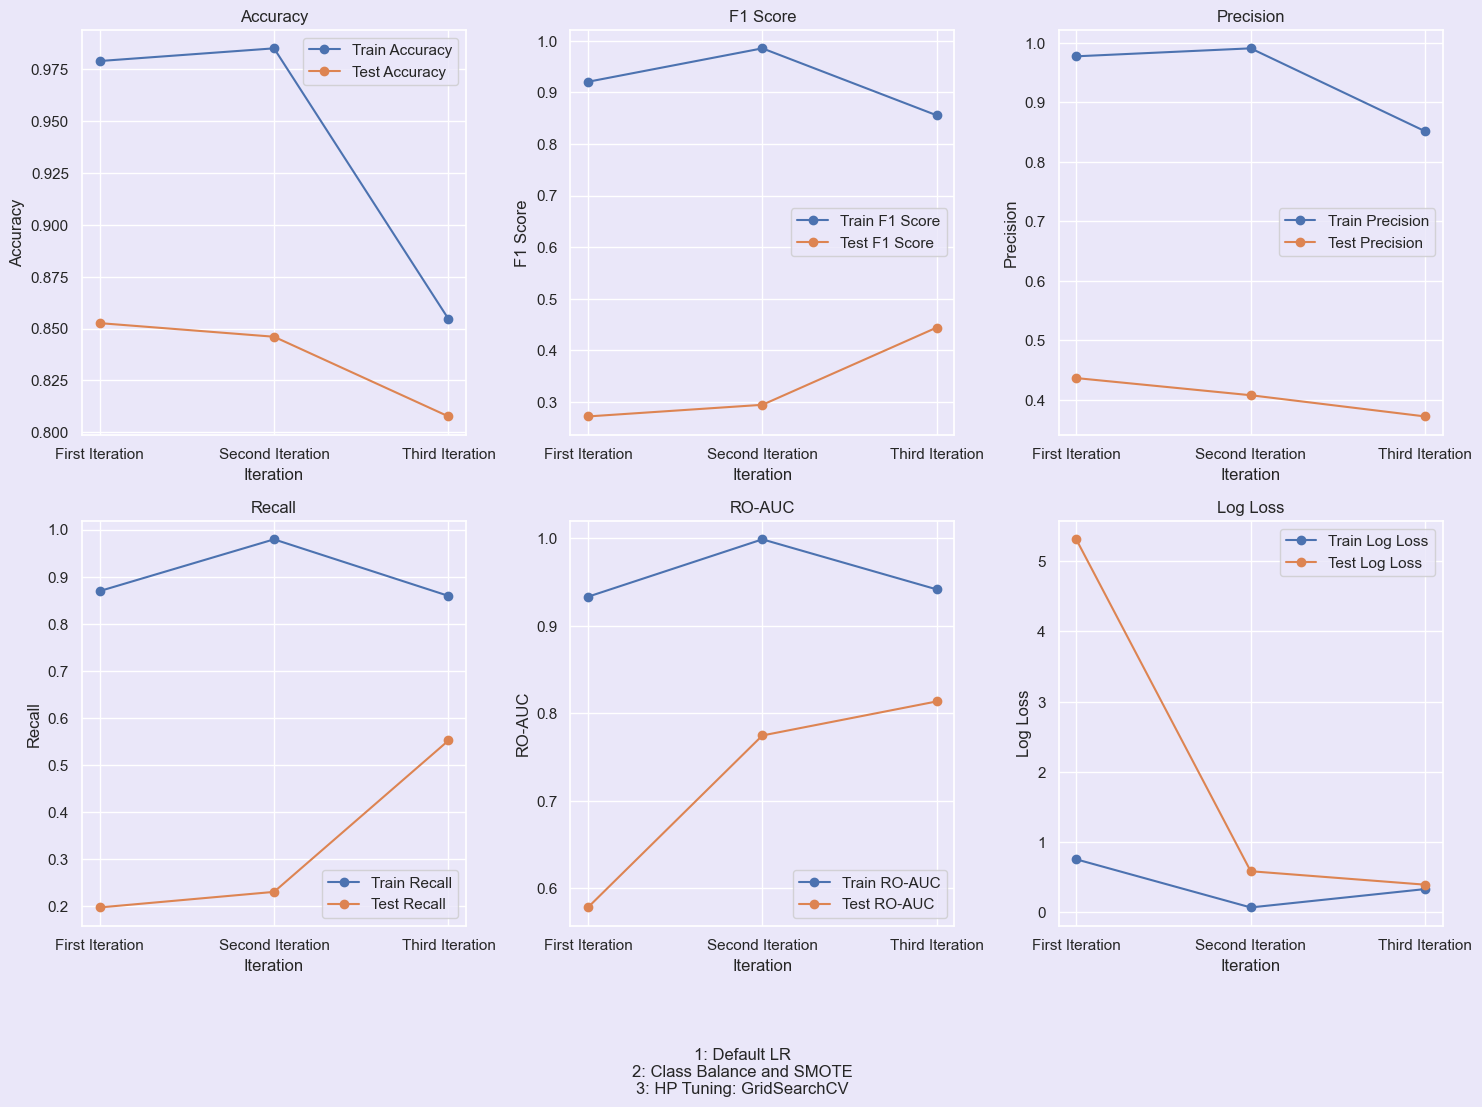

In [23]:
import matplotlib.pyplot as plt

iterations_info = [
    '1: Default LR',
    '2: Class Balance and SMOTE',
    '3: HP Tuning: GridSearchCV'
]

# Define the metrics for each iteration
iterations = ['First Iteration', 'Second Iteration', 'Third Iteration']
train_accuracies = [mean_train_accuracy_iter1, mean_train_accuracy_iter2, mean_train_accuracy_iter3]
test_accuracies = [mean_test_accuracy_iter1, mean_test_accuracy_iter2, mean_test_accuracy_iter3]
train_f1_scores = [mean_train_f1_iter1, mean_train_f1_iter2, mean_train_f1_iter3]
test_f1_scores = [mean_test_f1_iter1, mean_test_f1_iter2, mean_test_f1_iter3]
train_precisions = [mean_train_precision_iter1, mean_train_precision_iter2, mean_train_precision_iter3]
test_precisions = [mean_test_precision_iter1, mean_test_precision_iter2, mean_test_precision_iter3]
train_recalls = [mean_train_recall_iter1, mean_train_recall_iter2, mean_train_recall_iter3]
test_recalls = [mean_test_recall_iter1, mean_test_recall_iter2, mean_test_recall_iter3]
train_rocauc_scores = [mean_train_rocauc_score_iter1, mean_train_rocauc_score_iter2, mean_train_rocauc_score_iter3]
test_rocauc_scores = [mean_test_rocauc_score_iter1, mean_test_rocauc_score_iter2, mean_test_rocauc_score_iter3]
train_log_losses = [mean_train_log_loss_value_iter1, mean_train_log_loss_value_iter2, mean_train_log_loss_value_iter3]
test_log_losses = [mean_test_log_loss_value_iter1, mean_test_log_loss_value_iter2, mean_test_log_loss_value_iter3]

# Plot the metrics
plt.figure(figsize=(15, 10))

plt.subplot(2, 3, 1)
plt.plot(iterations, train_accuracies, marker='o', label='Train Accuracy')
plt.plot(iterations, test_accuracies, marker='o', label='Test Accuracy')
plt.title('Accuracy')
plt.xlabel('Iteration')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(2, 3, 2)
plt.plot(iterations, train_f1_scores, marker='o', label='Train F1 Score')
plt.plot(iterations, test_f1_scores, marker='o', label='Test F1 Score')
plt.title('F1 Score')
plt.xlabel('Iteration')
plt.ylabel('F1 Score')
plt.legend()

plt.subplot(2, 3, 3)
plt.plot(iterations, train_precisions, marker='o', label='Train Precision')
plt.plot(iterations, test_precisions, marker='o', label='Test Precision')
plt.title('Precision')
plt.xlabel('Iteration')
plt.ylabel('Precision')
plt.legend()

plt.subplot(2, 3, 4)
plt.plot(iterations, train_recalls, marker='o', label='Train Recall')
plt.plot(iterations, test_recalls, marker='o', label='Test Recall')
plt.title('Recall')
plt.xlabel('Iteration')
plt.ylabel('Recall')
plt.legend()

plt.subplot(2, 3, 5)
plt.plot(iterations, train_rocauc_scores, marker='o', label='Train RO-AUC')
plt.plot(iterations, test_rocauc_scores, marker='o', label='Test RO-AUC')
plt.title('RO-AUC')
plt.xlabel('Iteration')
plt.ylabel('RO-AUC')
plt.legend()

plt.subplot(2, 3, 6)
plt.plot(iterations, train_log_losses, marker='o', label='Train Log Loss')
plt.plot(iterations, test_log_losses, marker='o', label='Test Log Loss')
plt.title('Log Loss')
plt.xlabel('Iteration')
plt.ylabel('Log Loss')
plt.legend()

# Add the iterations information as a guidance label
extra_info = "\n".join(iterations_info)
plt.figtext(0.5, -0.1, extra_info, wrap=True, horizontalalignment='center', fontsize=12)

plt.tight_layout()
plt.show()

<div style="background-color:white;font-size:15px;font-family:Georgia;border-style: solid;border-color: #254E58;border-width:3px;padding:10px;margin: 1px;color:#254E58;overflow:hidden">

<b>Summary of Iterations for Random Forest Model:</b>

<b>Iteration 1: Default Random Forest</b>

Observations:

- High training accuracy (0.9790) but a significant drop in test accuracy (0.8524), indicating overfitting.
- Large discrepancy in F1 score and recall between training and test sets, suggesting poor generalization.
- Test RO-AUC and high log loss reveal issues with class separation and probability calibration.

Implication: The model overfits to the training data, capturing noise and failing to generalize well, likely due to lack of regularization and class imbalance.

<b>Iteration 2: Class Balance and SMOTE</b>

Observations:

- Slight increase in training accuracy (0.9851), with test accuracy remaining similar, indicating persistent overfitting.
- Improved recall and RO-AUC on the test set, but precision declines, indicating an increase in false positives.
- Test log loss improves significantly, suggesting better-calibrated probabilities.

Implication: Class balance and SMOTE improve recall and class separation, but precision challenges highlight the need for balancing trade-offs.

<b>Iteration 3: Hyperparameter Tuning: GridSearchCV</b>

Observations:

- More balanced accuracy (0.8546 train, 0.8076 test) indicates reduced overfitting and improved generalization.
- Significant improvement in test F1 score and recall, with precision also stabilizing.
- Test RO-AUC and log loss show enhanced class discrimination and probability calibration.

Implication: Hyperparameter tuning optimizes the model, achieving better balance between precision and recall, and reducing overfitting for improved generalization.

<b>Overall Conclusions:</b>

Overfitting: Initial iterations showed overfitting with high training performance but poor generalization, addressed through SMOTE and tuning.

Class Balance: SMOTE improved recall and RO-AUC, but precision challenges persisted, emphasizing the need for a balanced approach.

Hyperparameter Tuning: GridSearchCV significantly enhanced model performance, improving generalization and reducing overfitting.

<b>Significance:</b>

These iterations highlight the importance of iterative refinement in machine learning.

Systematically applying class balancing and hyperparameter tuning improved model robustness and reliability.

This process is essential for developing models that effectively meet the demands of real-world applications, ensuring better class separation and predictive accuracy.

</div>

<a id=""></a>
# <div style="padding:20px;color:white;margin:0;color:darkcyan;font-size:20px;font-family:Georgia;text-align:left;display:fill;border-radius:5px;background-color:#E0FFFF;overflow:hidden">Model Development: CDC Data: Random Forest: Conclusion</div>

<div style="background-color:white;font-size:15px;font-family:Georgia;border-style: solid;border-color: #254E58;border-width:3px;padding:10px;margin: 1px;color:#254E58;overflow:hidden">

<b>Best Metric for Random Forest:</b>

ROC AUC (Area Under the Receiver Operating Characteristic Curve):

Performance: The ROC AUC score improves across iterations, reaching 0.8135 in the third iteration, indicating strong class discrimination.

Interpretation: A high ROC AUC suggests that the model effectively distinguishes between individuals with and without diabetes, making it a reliable metric for evaluating model performance.

<b>Worst Metric for Random Forest:</b>

Precision:

Performance: Precision remains low, particularly on the test set, with values around 0.3719, indicating a high rate of false positives.

Interpretation: Low precision implies that the model frequently predicts diabetes in individuals who do not have it, potentially leading to unnecessary follow-up tests and increased anxiety.

<b>Overall Model Prediction for Diabetes:</b>

Strengths:
The model demonstrates a strong ROC AUC, which is crucial for accurately distinguishing between diabetic and non-diabetic individuals. The recall is reasonable, capturing a significant number of actual diabetes cases.

Weaknesses:
The low precision highlights a need to reduce false positives to ensure the model's predictions are actionable and reliable, especially in clinical settings.

<b>Conclusion:</b>
While the model is effective in distinguishing between classes, further refinement is needed to enhance precision and reduce false positives. Improving these areas will increase the model's practical utility and reliability in real-world applications, ensuring it provides trustworthy predictions for diabetes diagnosis. Addressing class imbalance and refining feature selection or engineering could lead to better outcomes.
</div>